In [83]:
from src.torch_loader import VectorizeParagraph, DatasetFromRepo
from transformers import GPT2Tokenizer
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import random

In [4]:
JSON_FILE_PATH = "data/ent_sum/"

In [12]:
novels_dataset = DatasetFromRepo(path=JSON_FILE_PATH, transform=lambda x:x)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
vectorize_paragraph = VectorizeParagraph(tokenizer, block_size=1020)

In [67]:
def nb_entities(example):
    return len(example[2]['persons'])

def nb_gpt2_tokens(example):
    return vectorize_paragraph(example).shape[0]

def string_after_vectorization(example):
    return tokenizer.decode(vectorize_paragraph(example))

def nb_chars(example):
    return len(string_after_vectorization(example))

def nb_space_tokens(example):
    return len(string_after_vectorization(example).split(" "))

In [91]:
stats = pd.DataFrame(columns=['example_idx', 'nb_entities', 'nb_chars', 'nb_space_tokens', 'nb_gpt2_tokens'])

In [104]:
nb_samples = 5000
for i in tqdm(range(nb_samples)):
    idx = random.randint(0, len(novels_dataset)-1)
    example = novels_dataset[idx]
    stats.loc[i] = [idx, 
                    nb_entities(example),
                    nb_chars(example),
                    nb_space_tokens(example),
                    nb_gpt2_tokens(example)]

In [105]:
nb_example_with_zero_entities = np.sum(stats["nb_entities"] == 0)
print("% of examples with zero entities :", nb_example_with_zero_entities/nb_samples)

% of examples with zero entities : 0.9954


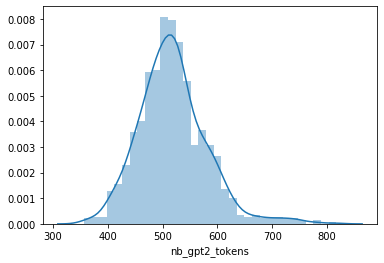

In [93]:
sns.distplot(stats["nb_gpt2_tokens"])

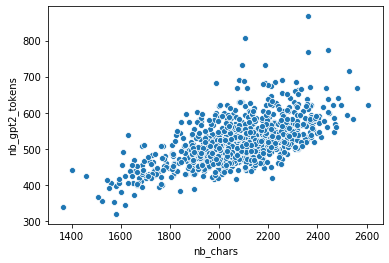

In [72]:
sns.scatterplot(x=stats['nb_chars'], y=stats['nb_gpt2_tokens'], data=stats)

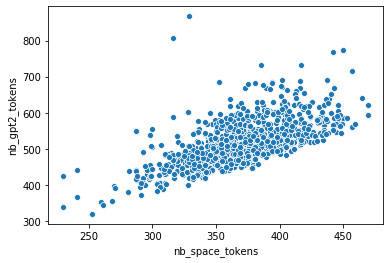

In [73]:
sns.scatterplot(x=stats['nb_space_tokens'], y=stats['nb_gpt2_tokens'], data=stats)

In [106]:
example_idx = stats['example_idx'][np.argmax(stats['nb_gpt2_tokens'])]
string_after_vectorization(novels_dataset[example_idx])

'[P1] would you pay us a cent--would you? I think I see you a doin’ it--ugh! No, no; flap down your fifty. If we get the job, and it pays, I’ll hand it back; if we don’t, it’s for our trouble,--that’s _far_, an’t it, Marks?” “Certainly, certainly,” said Marks, with a conciliatory tone; “it’s only a retaining fee, you see,--he! he! he!--we lawyers, you know. Wal, we must all keep good-natured,--keep easy, yer know. Tom’ll have the boy for yer, anywhere ye’ll name; won’t ye, Tom?” “If I find the young un, I’ll bring him on to Cincinnati, and leave him at Granny Belcher’s, on the landing,” said Loker. Marks had got from his pocket a greasy pocket-book, and taking a long paper from thence, he sat down, and fixing his keen black eyes on it, began mumbling over its contents: “Barnes--Shelby County--boy Jim, three hundred dollars for him, dead or alive.[P3] “Most likely,” said Marks, “she’s took in somewhere; but where, ’s a question. Tom, what do you say?” “We must cross the river tonight, n

In [108]:
example_idx = stats['example_idx'][np.argmin(stats['nb_gpt2_tokens'])]
string_after_vectorization(novels_dataset[example_idx])

'[P1]... 9 1 3 7 1 2 Injury to crops and plants... 5 --3 --3 5 Game-law offences......-- 15 1 14 2 1 l --2 ---------------------------------------------------------------- Total of accused[P3] Whatever the reason may be, as a matter of fact the thief is rarely or never reformed. When you can turn an old thief into an honest worker, you may turn an old fox into a house dog.[9][Sum][T] detective[Ent]  [M][P2] Here we have a statistical demonstration of a more frequent precocity, amongst various forms of criminality, in respect of inborn tendencies (murder and homicide, rape, incendiarism, specific thefts), or in respect of tendencies contracted by habit (simple theft, mendicity, vagrancy). Also this characteristic of precocity is accompanied by that of relapse, which accordingly we have seen to be more frequent in the same forms of natural criminality, and which we can now tabulate in respect of its persistency in these born and habitual criminals. It has been well said that the large nu

In [89]:
string_after_vectorization(novels_dataset[10456])

'[P1] For I, within my very bones, felt it to be the calm before the storm. When, later, we men passed to the library, we seemed to leave that atmosphere behind us. "Redmoat," said the Rev. J. D. Eltham, "has latterly become the theater of strange doings." He stood on the hearth-rug. A shaded lamp upon the big table and candles in ancient sconces upon the mantelpiece afforded dim illumination. Mr. Eltham\'s nephew, Vernon Denby, lolled smoking on the window-seat, and I sat near to him. Nayland Smith paced restlessly up and down the room. "Some months ago, almost a year," continued the clergyman, "a burglarious attempt was made upon the house.[P3] Today it is completely surrounded by barbed-wire fencing. Below this fence, on the east, is a narrow stream, a tributary of the Waverney; on the north and west, the high road, but nearly twenty feet below, the banks being perpendicular. On the south is the remaining part of the moat--now my kitchen garden; but from there up to the level of the